In [56]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import sklearn
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [106]:
dataset = pd.read_csv("cleaned_data3.csv")       
df = dataset.rename(columns={'overall_health_rating_f2178_0_0': 'OHR'})
df

,Unnamed: 0,DQI_score,sex_f31_0_0,number_of_daysweek_of_vigorous_physical_activity_10_minutes_f904_0_0,falls_in_the_last_year_f2296_0_0,frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0,OHR,trunk_fat_percentage_f23127_0_0,arm_fatfree_mass_right_f23121_0_0,arm_fatfree_mass_right_f23121_0_0.1,past_tobacco_smoking_f1249_0_0,standing_height_f50_0_0,seated_height_f51_0_0
0,1,65.058824,Female,0,No falls,Several days,Good,37.4,1.9,1.9,I have never smoked,167.0,139.0
1,2,76.470588,Male,0,Only one fall,Not at all,Good,29.1,3.6,3.6,Smoked on most or all days,167.0,140.0
2,3,69.764706,Male,3,No falls,Several days,Good,24.0,4.0,4.0,Smoked occasionally,182.0,144.0
3,4,76.470588,Male,0,No falls,Not at all,Good,27.4,2.9,2.9,I have never smoked,160.0,137.0
4,5,81.176471,Male,0,Only one fall,Several days,Excellent,20.0,3.3,3.3,Just tried once or twice,182.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269,10270,81.176471,Male,0,No falls,Not at all,Fair,30.8,3.5,3.5,Smoked on most or all days,164.0,133.0
10270,10271,81.176471,Female,2,No falls,Not at all,Good,36.9,2.6,2.6,I have never smoked,169.0,129.0
10271,10272,71.764706,Female,1,No falls,Not at all,Good,43.0,2.1,2.1,I have never smoked,158.0,124.0
10272,10273,85.882353,Female,0,No falls,Several days,Fair,29.4,2.4,2.4,Just tried once or twice,168.0,137.0


In [107]:
t = df["sex_f31_0_0"].unique()
df.loc[df["sex_f31_0_0"]==t[0],"sex_f31_0_0"] = 0
df.loc[df["sex_f31_0_0"]==t[1],"sex_f31_0_0"] = 1

In [108]:
t = df["falls_in_the_last_year_f2296_0_0"].unique()
df.loc[df["falls_in_the_last_year_f2296_0_0"]==t[0],"falls_in_the_last_year_f2296_0_0"] = 0
df.loc[df["falls_in_the_last_year_f2296_0_0"]==t[1],"falls_in_the_last_year_f2296_0_0"] = 1
df.loc[df["falls_in_the_last_year_f2296_0_0"]==t[2],"falls_in_the_last_year_f2296_0_0"] = 2

In [109]:
t = ["Poor","Fair","Good","Excellent"]
df.loc[df["OHR"]=="Poor","OHR"] = 0
df.loc[df["OHR"]=="Fair","OHR"] = 1
df.loc[df["OHR"]=="Good","OHR"] = 2
df.loc[df["OHR"]=="Excellent","OHR"] = 3

In [110]:
t = df["frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"].unique()
df.loc[df["frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"]==t[1],"frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"] = 0
df.loc[df["frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"]==t[0],"frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"] = 1
df.loc[df["frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"]==t[2],"frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"] = 2
df.loc[df["frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"]==t[3],"frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0"] = 3

In [111]:
t = df["past_tobacco_smoking_f1249_0_0"].unique()
df.loc[df["past_tobacco_smoking_f1249_0_0"]==t[0],"past_tobacco_smoking_f1249_0_0"] = 0
df.loc[df["past_tobacco_smoking_f1249_0_0"]==t[3],"past_tobacco_smoking_f1249_0_0"] = 1
df.loc[df["past_tobacco_smoking_f1249_0_0"]==t[2],"past_tobacco_smoking_f1249_0_0"] = 2
df.loc[df["past_tobacco_smoking_f1249_0_0"]==t[1],"past_tobacco_smoking_f1249_0_0"] = 3

In [112]:
df = df.drop(df.columns[[0]], axis=1)
df

,DQI_score,sex_f31_0_0,number_of_daysweek_of_vigorous_physical_activity_10_minutes_f904_0_0,falls_in_the_last_year_f2296_0_0,frequency_of_tiredness_lethargy_in_last_2_weeks_f2080_0_0,OHR,trunk_fat_percentage_f23127_0_0,arm_fatfree_mass_right_f23121_0_0,arm_fatfree_mass_right_f23121_0_0.1,past_tobacco_smoking_f1249_0_0,standing_height_f50_0_0,seated_height_f51_0_0
0,65.058824,0,0,0,1,2,37.4,1.9,1.9,0,167.0,139.0
1,76.470588,1,0,1,0,2,29.1,3.6,3.6,3,167.0,140.0
2,69.764706,1,3,0,1,2,24.0,4.0,4.0,2,182.0,144.0
3,76.470588,1,0,0,0,2,27.4,2.9,2.9,0,160.0,137.0
4,81.176471,1,0,1,1,3,20.0,3.3,3.3,1,182.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10269,81.176471,1,0,0,0,1,30.8,3.5,3.5,3,164.0,133.0
10270,81.176471,0,2,0,0,2,36.9,2.6,2.6,0,169.0,129.0
10271,71.764706,0,1,0,0,2,43.0,2.1,2.1,0,158.0,124.0
10272,85.882353,0,0,0,1,1,29.4,2.4,2.4,1,168.0,137.0


In [113]:
X = df.drop(df.columns[[5]], axis=1)
y = df.iloc[:,5]
y=y.astype('int')

<AxesSubplot:xlabel='DQI_score', ylabel='Count'>

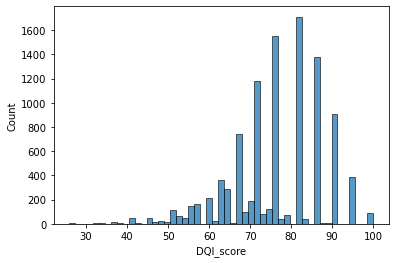

In [285]:
import seaborn as sns
sns.histplot(df['DQI_score'])

<AxesSubplot:xlabel='OHR', ylabel='count'>

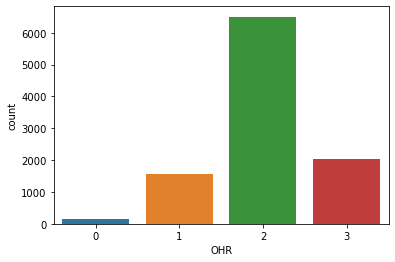

In [286]:
sns.countplot(df['OHR'])

### NearMiss Undersampling

In [115]:
!pip install imblearn

In [144]:
ratio = {0:200, 1:400, 2:400, 3:200}
type(ratio)

dict

In [148]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

In [354]:
len(X)

656

<AxesSubplot:xlabel='OHR', ylabel='count'>

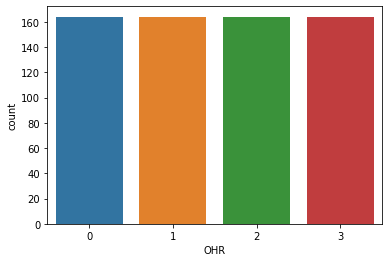

In [356]:
sns.countplot(y)

### Random Forest

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70, stratify=y)

In [327]:
rfc=RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


gs_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy',verbose=1)
gs_rfc.fit(X_train,y_train)
#gs_rfc.fit(X,y)
gs_rfc.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [332]:
best_rfc = RandomForestClassifier(n_estimators = 500,max_features='log2', max_depth = 6 , criterion = 'entropy')

rfc = best_rfc.fit(X_train,y_train)

y_test_pred = rfc.predict(X_test)

ls_test_labels = ["Poor","Fair","Good","Excellent"]
label_dict = {"Poor":0, "Fair":1, "Good":2, "Excellent":3}
rev_subs = { v:k for k,v in label_dict.items()}
y_test_pred = [rev_subs.get(item,item)  for item in y_test_pred]
y_test_labels = [rev_subs.get(item,item)  for item in y_test]

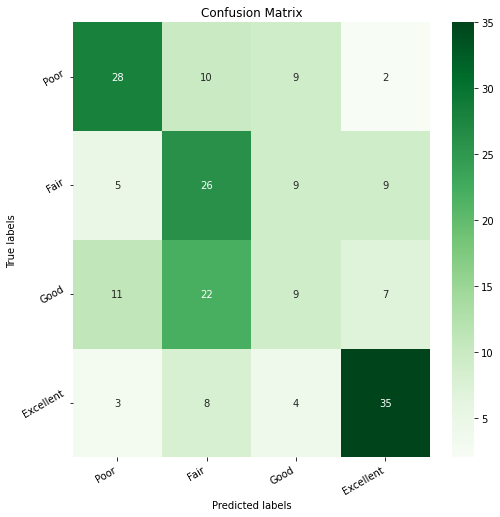

              precision    recall  f1-score   support

        Poor       0.66      0.70      0.68        50
        Fair       0.39      0.53      0.45        49
        Good       0.29      0.18      0.23        49
   Excellent       0.60      0.57      0.58        49

    accuracy                           0.50       197
   macro avg       0.49      0.50      0.49       197
weighted avg       0.49      0.50      0.49       197



In [333]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test_labels, y_test_pred)
labels = label_dict.keys()

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()
print(classification_report(list(y_test_labels),list(y_test_pred),labels=list(labels)))

### CATE and ATE

In [384]:
test = pd.concat([X_test,y_test],axis=1)

In [338]:
from scipy import stats as st
m = st.mode(X["DQI_score"])
int(m[0])

81

In [398]:
np.percentile(test["DQI_score"],5)

64.0588235294118

In [399]:
np.median(test["DQI_score"])

81.1764705882353

In [430]:
X_max = X_test.copy()
X_max.loc[:,"DQI_score"] = np.percentile(df["DQI_score"],97.5)
X_min = X_test.copy()
X_min.loc[:,"DQI_score"] = np.percentile(df["DQI_score"],2.5)
X_mid = X_test.copy()
X_mid.loc[:,"DQI_score"] = np.median(df["DQI_score"])

In [406]:
X_max = X_test.copy()
X_max.loc[:,"DQI_score"] = 100
X_min = X_test.copy()
X_min.loc[:,"DQI_score"] = 0
X_mid = X_test.copy()
X_mid.loc[:,"DQI_score"] = np.median(df["DQI_score"])

In [431]:
H_max = rfc.predict(X_max)
H_min = rfc.predict(X_min)
H_mid = rfc.predict(X_mid)

In [432]:
pct1 = sum(H_max - H_mid >= 1) / len(X_max)
pct2 = sum(H_mid - H_min >= 1) / len(X_max) 
pct3 = sum(H_max - H_min >= 2) / len(X_max) 
pct1, pct2, pct3

(0.005076142131979695, 0.5888324873096447, 0.19796954314720813)

In [433]:
median_0 = np.median(test.loc[test["OHR"]==0,"DQI_score"])
median_1 = np.median(test.loc[test["OHR"]==1,"DQI_score"])
median_2 = np.median(test.loc[test["OHR"]==2,"DQI_score"])
median_3 = np.median(test.loc[test["OHR"]==3,"DQI_score"])

<AxesSubplot:xlabel='DQI_score', ylabel='Count'>

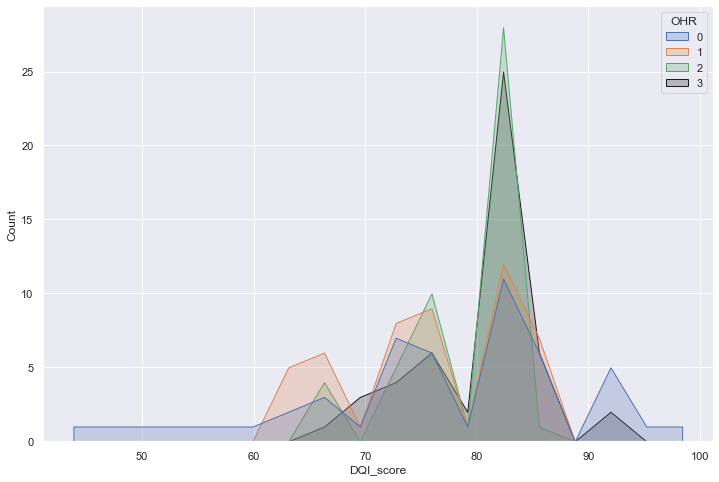

In [434]:
sns.set(rc = {"figure.figsize":(12,8)})
palette = iter(sns.husl_palette(4))
sns.histplot(data = test,x = "DQI_score", hue = "OHR",element="poly",palette=["C0","C1","C2","k"])

In [435]:
median_0, median_1, median_2, median_3

(77.3235294117647, 76.4705882352941, 81.1764705882353, 81.1764705882353)

In [436]:
X_median_0 = X_test.copy()
X_median_0.loc[:,"DQI_score"] = median_0
X_median_1 = X_test.copy()
X_median_1.loc[:,"DQI_score"] = median_1
X_median_2 = X_test.copy()
X_median_2.loc[:,"DQI_score"] = median_2
X_median_3 = X_test.copy()
X_median_3.loc[:,"DQI_score"] = median_3

In [437]:
H_median_0 = rfc.predict(X_median_0)
H_median_1 = rfc.predict(X_median_1)
H_median_2 = rfc.predict(X_median_2)
H_median_3 = rfc.predict(X_median_3)

pct_01 = sum(H_median_1 - H_median_0 >= 1) / len(X_test)
pct_12 = sum(H_median_2 - H_median_1 >= 1) / len(X_test)
pct_23 = sum(H_median_3 - H_median_2 >= 1) / len(X_test)
pct_01, pct_12, pct_23

(0.0, 0.02030456852791878, 0.0)

In [438]:
ATE_1 = np.mean(H_max - H_mid)
ATE_2 = np.mean(H_mid - H_min)
ATE_3 = np.mean(H_max - H_min)
ATE_01 = np.mean(H_median_1 - H_median_0)
ATE_12 = np.mean(H_median_2 - H_median_1)
ATE_23 = np.mean(H_median_3 - H_median_2)

ATE_1,ATE_2,ATE_3, ATE_01, ATE_12, ATE_23

(-0.15736040609137056,
 0.9390862944162437,
 0.7817258883248731,
 0.0,
 0.025380710659898477,
 0.0)

confusion matrix

histplot

median to max not significant